In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',10000)

In [4]:
aucm = pd.read_csv('Auction_master_train.csv')

In [5]:
aucm

Auction_key Auction_class Bid_class  Claim_price Appraisal_company  \
0            2687            임의        개별   1766037301              정명감정   
1            2577            임의        일반    152946867               희감정   
2            2197            임의        개별     11326510              혜림감정   
3            2642            임의        일반    183581724              신라감정   
4            1958            강제        일반     45887671              나라감정   
5            2238            강제        일반    105437195             한마음감정   
6            1923            임의        일반    137548730            미래새한감정   
7            2527            임의        일반    506916971              부일감정   
8            2259            강제        일반     40782876              금정감정   
9            2666            임의        일반    150000000              연산감정   
10           2362            임의        개별    500000000              명장감정   
11           1947            임의        일반     37122950              명장감정   
12           2298            임의        일반     25000000              문일감정   
13           2550            임의        일반    135000000              미르감정   
14           2046            임의        일반    953680000              국제감정   
15           2678            강제        일반     13848484              드림감정   
16           2682            임의        일반    149393725              금정감정   
17           1861            임의        개별   1046685025              대일감정   
18           2037            임의        일반     42479480            미래새한감정   
19           2103            임의        일반     30665922             한마음감정   
20           2254            강제        일반    160000000              혜림감정   
21           1971            임의        일반     45589041              드림감정   
22           2491            임의        일반    122134370              문일감정   
23           2067            강제        일반     19800000              대한감정   
24           1960            강제        일반    122663013               희감정   
25           2074            임의        일반    120000000              내외감정   
26           2305            임의        일반    311657509              대일감정   
27           2237            임의        일반    135600000              대한감정   
28           2712            임의        일반     51975561              대한감정   
29           1783            강제        개별   1087000000              대한감정   
30           2164            임의        일반     90000000             오상호감정   
31           1964            임의        일반    218076179              대화감정   
32           1826            임의        일반     45000000              태화감정   
33           2399            임의        일반     15000000              대일감정   
34           2576            임의        일반    200000000              국제감정   
35           1940            임의        일반     14666666               희감정   
36           2124            임의        일반     17980668              하나감정   
37           2025            강제        일반     40000000              나라감정   
38           2400            임의        일반    360000000              써브감정   
39           2332            임의        개별      5691450              부경감정   
40           1819            임의        일반    137710940              통일감정   
41           2143            임의        일반    132176824              대화감정   
42           2193            임의        일반    600000000              나라감정   
43           2155            강제        일반     25750841             한마음감정   
44           2172            임의        개별    100000000              대화감정   
45           1910            임의        일반    118958072              삼보감정   
46           2686            강제        일반     61932733             한마음감정   
47           2022            임의        일반     63202614              대한감정   
48           2173            임의        일반    264822041              한라감정   
49           2171            임의        개별    100000000              대화감정   
50           2157            강제        일반     12764116              대일감정   
51           2503            강제        일반     48644335

In [6]:
aucm.shape

(1933, 41)

In [7]:
aucm.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

# 1.변수간 correlation

In [8]:
aucm.corr()['Hammer_price']

Auction_key                   -0.418769
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Total_floor                    0.220830
Current_floor                  0.198013
road_bunji1                    0.020404
road_bunji2                    0.206681
point.y                        0.295698
point.x                       -0.296312
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

### 총토지실면적, 총토지경매면적, 총건물면적, 총건물경매면적, 총감정가!, 최저매각가격!의 correlation이 높다 -> 이 6개의 변수를 모두 linear regression에 적용할 경우 다중공산성의 위험 => 하나를 선택! 

### 총감정가, 최저 매각가격은 어떻게 변수처리를 해야할 것인가

# 2. 건물면적 변수간의 관계

In [9]:
import seaborn as sns

<AxesSubplot:>

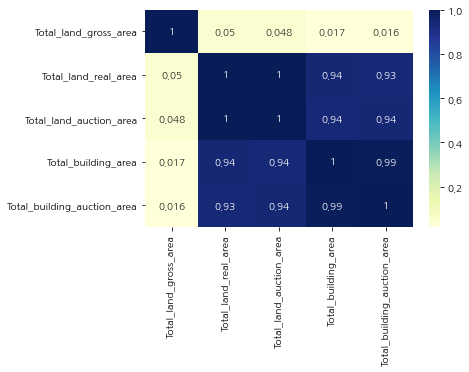

In [10]:
sns.heatmap(aucm.iloc[:,8:13].corr(),annot=True,cmap='YlGnBu')

### 해석력 유지할려면 떨궈서 총건물경매면적, 총토지전체면적 변수만 사용
FA 방법 사용해서 차원 축소하자(공분산 행렬의 구조를 유지하면서 잠재변수를 찾아서 차원축소하는 방법, 유사한 변수끼리 묶어준다)

# 3. 이상치 제거

In [11]:
aucm['addr_do'].unique() #시 도

array(['부산', '서울'], dtype=object)

<AxesSubplot:xlabel='addr_si', ylabel='Hammer_price'>

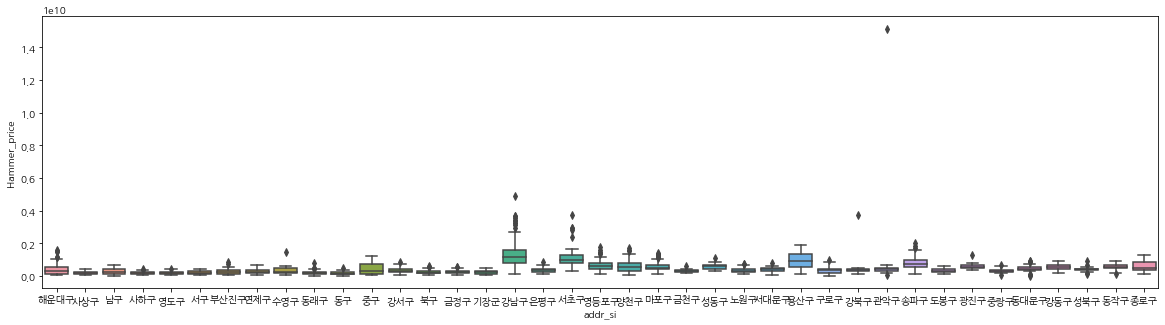

In [12]:
figure,ax1 = plt.subplots()
figure.set_size_inches(20,5)

sns.boxplot(x='addr_si',y='Hammer_price',data=aucm)

### 구별로 이상치 제거해야함 -> 3q 이상의 값을 다 지울까?

In [13]:
aucm['addr_si'].unique()

array(['해운대구', '사상구', '남구', '사하구', '영도구', '서구', '부산진구', '연제구', '수영구',
       '동래구', '동구', '중구', '강서구', '북구', '금정구', '기장군', '강남구', '은평구', '서초구',
       '영등포구', '양천구', '마포구', '금천구', '성동구', '노원구', '서대문구', '용산구', '구로구',
       '강북구', '관악구', '송파구', '도봉구', '광진구', '중랑구', '동대문구', '강동구', '성북구',
       '동작구', '종로구'], dtype=object)

In [14]:
add = aucm['addr_si'].unique()

In [15]:
si = []
for i in range(0,39):
    si.append(aucm[aucm['addr_si']==add[i]]['Hammer_price'].quantile(q=0.75))

In [16]:
si

[540898902.0,
 244747750.0,
 397950000.0,
 207477500.0,
 221017200.0,
 293000000.0,
 344974750.0,
 378495000.0,
 447899990.0,
 246814500.0,
 205055500.0,
 737044425.0,
 436750000.0,
 284811000.0,
 282999900.0,
 306449000.0,
 1586850000.0,
 421690000.0,
 1303890000.0,
 780884440.0,
 764074999.25,
 647575000.0,
 371111000.0,
 678450000.0,
 417913000.0,
 476234600.0,
 1312500000.0,
 438500000.0,
 411111000.0,
 480750000.0,
 961290750.0,
 424464975.0,
 669779999.5,
 381510000.0,
 516510000.0,
 649025000.0,
 431049900.0,
 689990000.0,
 841000000.0]

In [17]:
aucm[aucm['addr_si']==add[0]]['Hammer_price']<si[0]

0      False
1      False
9       True
13      True
16      True
22      True
34      True
51      True
55      True
56      True
67     False
75      True
79     False
86      True
96      True
97     False
113     True
137    False
176    False
177     True
182     True
191     True
207     True
208     True
210     True
212     True
222     True
234     True
243     True
251     True
253    False
254    False
257     True
262     True
264     True
286     True
287     True
288     True
289    False
303    False
304     True
331    False
333     True
337     True
342    False
345     True
350     True
371     True
376     True
384     True
386    False
387     True
389     True
402    False
417     True
421    False
447     True
468     True
472     True
475     True
477    False
484     True
490    False
511     True
515     True
520     True
522     True
533     True
544    False
551     True
552     True
554     True
557     True
561    False
562     True
564    False
575     True

### 1q 이상의 값도 지워버리자

In [18]:
si = []
for i in range(0,39):
    si.append(aucm[aucm['addr_si']==add[i]]['Hammer_price'].quantile(q=0.85))

In [19]:
aucm0 = aucm[aucm['addr_si']==add[0]]
aucm0 = aucm0[aucm0['Hammer_price']<=si[0]]
aucm1 = aucm[aucm['addr_si']==add[1]]
aucm1 = aucm1[aucm1['Hammer_price']<=si[1]]
aucm2 = aucm[aucm['addr_si']==add[2]]
aucm2 = aucm2[aucm2['Hammer_price']<=si[2]]
aucm3 = aucm[aucm['addr_si']==add[3]]
aucm3 = aucm3[aucm3['Hammer_price']<=si[3]]
aucm4 = aucm[aucm['addr_si']==add[4]]
aucm4 = aucm4[aucm4['Hammer_price']<=si[4]]
aucm5 = aucm[aucm['addr_si']==add[5]]
aucm5 = aucm5[aucm5['Hammer_price']<=si[5]]
aucm6 = aucm[aucm['addr_si']==add[6]]
aucm6 = aucm6[aucm6['Hammer_price']<=si[6]]
aucm7 = aucm[aucm['addr_si']==add[7]]
aucm7 = aucm7[aucm7['Hammer_price']<=si[7]]
aucm8 = aucm[aucm['addr_si']==add[8]]
aucm8 = aucm8[aucm8['Hammer_price']<=si[8]]
aucm9 = aucm[aucm['addr_si']==add[9]]
aucm9 = aucm9[aucm9['Hammer_price']<=si[9]]
aucm10 = aucm[aucm['addr_si']==add[10]]
aucm10 = aucm10[aucm10['Hammer_price']<=si[10]]
aucm11 = aucm[aucm['addr_si']==add[11]]
aucm11 = aucm11[aucm11['Hammer_price']<=si[11]]
aucm12 = aucm[aucm['addr_si']==add[12]]
aucm12 = aucm12[aucm12['Hammer_price']<=si[12]]
aucm13 = aucm[aucm['addr_si']==add[13]]
aucm13 = aucm13[aucm13['Hammer_price']<=si[13]]
aucm14 = aucm[aucm['addr_si']==add[14]]
aucm14 = aucm14[aucm14['Hammer_price']<=si[14]]
aucm15 = aucm[aucm['addr_si']==add[15]]
aucm15 = aucm15[aucm15['Hammer_price']<=si[15]]
aucm16 = aucm[aucm['addr_si']==add[16]]
aucm16 = aucm16[aucm16['Hammer_price']<=si[16]]
aucm17 = aucm[aucm['addr_si']==add[17]]
aucm17 = aucm17[aucm17['Hammer_price']<=si[17]]
aucm18 = aucm[aucm['addr_si']==add[18]]
aucm18 = aucm18[aucm18['Hammer_price']<=si[18]]
aucm19 = aucm[aucm['addr_si']==add[19]]
aucm19 = aucm19[aucm19['Hammer_price']<=si[19]]
aucm20 = aucm[aucm['addr_si']==add[20]]
aucm20 = aucm20[aucm20['Hammer_price']<=si[20]]
aucm21 = aucm[aucm['addr_si']==add[21]]
aucm21 = aucm21[aucm21['Hammer_price']<=si[21]]
aucm22 = aucm[aucm['addr_si']==add[22]]
aucm22 = aucm22[aucm22['Hammer_price']<=si[22]]
aucm23 = aucm[aucm['addr_si']==add[23]]
aucm23 = aucm23[aucm23['Hammer_price']<=si[23]]
aucm24 = aucm[aucm['addr_si']==add[24]]
aucm24 = aucm24[aucm24['Hammer_price']<=si[24]]
aucm25 = aucm[aucm['addr_si']==add[25]]
aucm25 = aucm25[aucm25['Hammer_price']<=si[25]]
aucm26 = aucm[aucm['addr_si']==add[26]]
aucm26 = aucm26[aucm26['Hammer_price']<=si[26]]
aucm27 = aucm[aucm['addr_si']==add[27]]
aucm27 = aucm27[aucm27['Hammer_price']<=si[27]]
aucm28 = aucm[aucm['addr_si']==add[28]]
aucm28 = aucm28[aucm28['Hammer_price']<=si[28]]
aucm29 = aucm[aucm['addr_si']==add[29]]
aucm29 = aucm29[aucm29['Hammer_price']<=si[29]]
aucm30 = aucm[aucm['addr_si']==add[30]]
aucm30 = aucm30[aucm30['Hammer_price']<=si[30]]
aucm31 = aucm[aucm['addr_si']==add[31]]
aucm31 = aucm31[aucm31['Hammer_price']<=si[31]]
aucm32 = aucm[aucm['addr_si']==add[32]]
aucm32 = aucm32[aucm32['Hammer_price']<=si[32]]
aucm33 = aucm[aucm['addr_si']==add[33]]
aucm33 = aucm33[aucm33['Hammer_price']<=si[33]]
aucm34 = aucm[aucm['addr_si']==add[34]]
aucm34 = aucm34[aucm34['Hammer_price']<=si[34]]
aucm35 = aucm[aucm['addr_si']==add[35]]
aucm35 = aucm35[aucm35['Hammer_price']<=si[35]]
aucm36 = aucm[aucm['addr_si']==add[36]]
aucm36 = aucm36[aucm36['Hammer_price']<=si[36]]
aucm37 = aucm[aucm['addr_si']==add[37]]
aucm37 = aucm37[aucm37['Hammer_price']<=si[37]]
aucm38 = aucm[aucm['addr_si']==add[38]]
aucm38 = aucm38[aucm38['Hammer_price']<=si[38]]

In [20]:
si = []
for i in range(0,39):
    si.append(aucm[aucm['addr_si']==add[i]]['Hammer_price'].quantile(q=0.15))

In [21]:
aucm0 = aucm0[aucm0['Hammer_price']>si[0]]
aucm1 = aucm1[aucm1['Hammer_price']>si[1]]
aucm2 = aucm2[aucm2['Hammer_price']>si[2]]
aucm3 = aucm3[aucm3['Hammer_price']>si[3]]
aucm4 = aucm4[aucm4['Hammer_price']>si[4]]
aucm5 = aucm5[aucm5['Hammer_price']>si[5]]
aucm6 = aucm6[aucm6['Hammer_price']>si[6]]
aucm7 = aucm7[aucm7['Hammer_price']>si[7]]
aucm8 = aucm8[aucm8['Hammer_price']>si[8]]
aucm9 = aucm9[aucm9['Hammer_price']>si[9]]
aucm10 = aucm10[aucm10['Hammer_price']>si[10]]
aucm11 = aucm11[aucm11['Hammer_price']>si[11]]
aucm12 = aucm12[aucm12['Hammer_price']>si[12]]
aucm13 = aucm13[aucm13['Hammer_price']>si[13]]
aucm14 = aucm14[aucm14['Hammer_price']>si[14]]
aucm15 = aucm15[aucm15['Hammer_price']>si[15]]
aucm16 = aucm16[aucm16['Hammer_price']>si[16]]
aucm17 = aucm17[aucm17['Hammer_price']>si[17]]
aucm18 = aucm18[aucm18['Hammer_price']>si[18]]
aucm19 = aucm19[aucm19['Hammer_price']>si[19]]
aucm20 = aucm20[aucm20['Hammer_price']>si[20]]
aucm21 = aucm21[aucm21['Hammer_price']>si[21]]
aucm22 = aucm22[aucm22['Hammer_price']>si[22]]
aucm23 = aucm23[aucm23['Hammer_price']>si[23]]
aucm24 = aucm24[aucm24['Hammer_price']>si[24]]
aucm25 = aucm25[aucm25['Hammer_price']>si[25]]
aucm26 = aucm26[aucm26['Hammer_price']>si[26]]
aucm27 = aucm27[aucm27['Hammer_price']>si[27]]
aucm28 = aucm28[aucm28['Hammer_price']>si[28]]
aucm29 = aucm29[aucm29['Hammer_price']>si[29]]
aucm30 = aucm30[aucm30['Hammer_price']>si[30]]
aucm31 = aucm31[aucm31['Hammer_price']>si[31]]
aucm32 = aucm32[aucm32['Hammer_price']>si[32]]
aucm33 = aucm33[aucm33['Hammer_price']>si[33]]
aucm34 = aucm34[aucm34['Hammer_price']>si[34]]
aucm35 = aucm35[aucm35['Hammer_price']>si[35]]
aucm36 = aucm36[aucm36['Hammer_price']>si[36]]
aucm37 = aucm37[aucm37['Hammer_price']>si[37]]
aucm38 = aucm38[aucm38['Hammer_price']>si[38]]

In [22]:
aucm111 = pd.concat([aucm0,aucm1,aucm2,aucm3,aucm4,aucm5,aucm6,aucm7,aucm8,aucm9])
aucm222 = pd.concat([aucm10,aucm11,aucm12,aucm13,aucm14,aucm15,aucm16,aucm17,aucm18,aucm19])
aucm333 = pd.concat([aucm20,aucm21,aucm22,aucm23,aucm24,aucm25,aucm26,aucm27,aucm28,aucm29])
aucm444 = pd.concat([aucm30,aucm31,aucm32,aucm33,aucm34,aucm35,aucm36,aucm37,aucm38])
aucmo = pd.concat([aucm111,aucm222,aucm333,aucm444])

In [23]:
aucmo.shape

(1322, 41)

### 1-3q 사이로 제한을 두면 데이터가 반 이상 사라져서 15-85%로 수정

# 4. NA값 처리

In [24]:
aucmo.isna().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1307
addr_san                          0
addr_bunji1                       3
addr_bunji2                     721
addr_etc                          0
Apartment_usage             

### na값 많은 동, 번지2,specific,번지2 지운다

### 동 이후의 주소는 분석에 크게 상관없을 것 같아서 일단 지웁니다(prediction 보다는 해석이 목적이라고 하셨기 때문에 최대한 simple한 model을 지향!)

In [25]:
aucmo.drop(['addr_li','addr_bunji2','Specific','road_bunji2','addr_san','addr_bunji1','addr_etc','road_bunji1'],axis=1,inplace=True)

In [26]:
aucmo.shape

(1322, 33)

In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)

<AxesSubplot:xlabel='addr_si', ylabel='Hammer_price'>

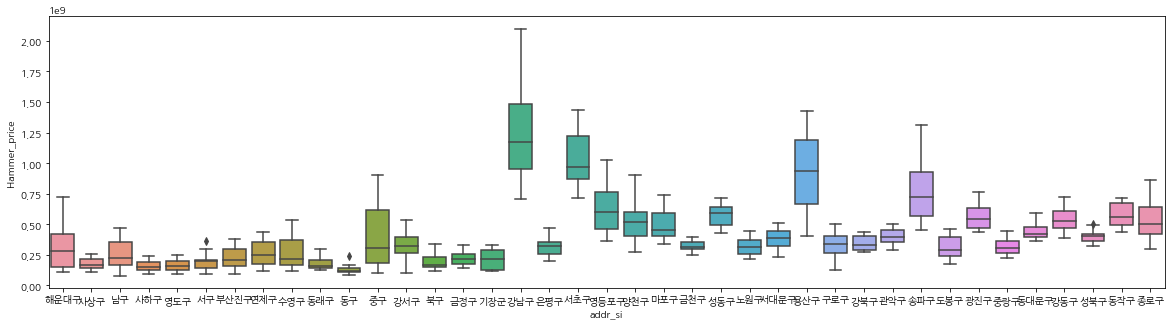

In [28]:
figure,ax1 = plt.subplots()
figure.set_size_inches(20,5)

sns.boxplot(x='addr_si',y='Hammer_price',data=aucmo)

###  barplot을 통해 이상치 거의 없음을 확인

In [29]:
aucmo['Hammer_price'].describe()

count         1322.00
mean     429611447.31
std      311205368.27
min       78419900.00
25%      217548750.00
50%      351949499.50
75%      505750249.25
max     2100999000.00
Name: Hammer_price, dtype: float64

### 전처리를 일부 진행한 데이터의 낙찰가의 평균은 429611447.31원인 것으로 확인
대부분의 낙찰가는 217548750원 ~ 505750249원 사이에 분포함

# 5. 범주형 변수 score 부여

In [30]:
category = aucmo.select_dtypes(include = [object])
category.columns

Index(['Auction_class', 'Bid_class', 'Appraisal_company', 'Appraisal_date',
       'First_auction_date', 'Final_auction_date', 'Final_result', 'Creditor',
       'addr_do', 'addr_si', 'addr_dong', 'Apartment_usage',
       'Preserve_regist_date', 'Share_auction_YorN', 'road_name', 'Close_date',
       'Close_result'],
      dtype='object')

In [31]:
category.head()

Auction_class Bid_class Appraisal_company       Appraisal_date  \
9             임의        일반              연산감정  2017-03-27 00:00:00   
13            임의        일반              미르감정  2016-07-24 00:00:00   
16            임의        일반              금정감정  2017-07-04 00:00:00   
22            임의        일반              문일감정  2016-01-26 00:00:00   
34            임의        일반              국제감정  2016-08-26 00:00:00   

     First_auction_date   Final_auction_date Final_result Creditor addr_do  \
9   2017-09-26 00:00:00  2017-10-31 00:00:00           낙찰   코카콜라음료      부산   
13  2017-01-19 00:00:00  2017-03-30 00:00:00           낙찰    대부F&D      부산   
16  2017-12-05 00:00:00  2018-03-20 00:00:00           낙찰   HK저축은행      부산   
22  2016-06-23 00:00:00  2016-07-28 00:00:00           낙찰   청룡동(새)      부산   
34  2017-01-24 00:00:00  2017-01-24 00:00:00           낙찰  Private      부산   

   addr_si addr_dong Apartment_usage Preserve_regist_date Share_auction_YorN  \
9     해운대구       재송동             아파트  1990-08-10 00:00:00                  N   
13    해운대구        중동             아파트  2015-06-17 00:00:00                  N   
16    해운대구       재송동             아파트  2009-09-28 00:00:00                  N   
22    해운대구       재송동             아파트  2000-09-28 00:00:00                  N   
34    해운대구       반여동             아파트  2006-01-20 00:00:00                  N   

     road_name           Close_date Close_result  
9      재반로84번길  2017-12-27 00:00:00           배당  
13  좌동순환로433번길  2017-07-24 00:00:00           배당  
16         재반로  2018-05-16 00:00:00           배당  
22         재반로  2016-09-26 00:00:00           배당  
34         반여로  2017-03-29 00:00:00           배당

### 
- 개인적으로 prediction에 관계있는 변수는 Auction_class, Bid_class, Share_auction_YorN
- 이 변수들 간의 score를 어떻게 줄 것인가

In [32]:
hammer = aucmo['Hammer_price'].values

In [33]:
category['Hammer_price'] = hammer

<ipython-input-33-35551cc072e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['Hammer_price'] = hammer


In [34]:
category.head()

Auction_class Bid_class Appraisal_company       Appraisal_date  \
9             임의        일반              연산감정  2017-03-27 00:00:00   
13            임의        일반              미르감정  2016-07-24 00:00:00   
16            임의        일반              금정감정  2017-07-04 00:00:00   
22            임의        일반              문일감정  2016-01-26 00:00:00   
34            임의        일반              국제감정  2016-08-26 00:00:00   

     First_auction_date   Final_auction_date Final_result Creditor addr_do  \
9   2017-09-26 00:00:00  2017-10-31 00:00:00           낙찰   코카콜라음료      부산   
13  2017-01-19 00:00:00  2017-03-30 00:00:00           낙찰    대부F&D      부산   
16  2017-12-05 00:00:00  2018-03-20 00:00:00           낙찰   HK저축은행      부산   
22  2016-06-23 00:00:00  2016-07-28 00:00:00           낙찰   청룡동(새)      부산   
34  2017-01-24 00:00:00  2017-01-24 00:00:00           낙찰  Private      부산   

   addr_si addr_dong Apartment_usage Preserve_regist_date Share_auction_YorN  \
9     해운대구       재송동             아파트  1990-08-10 00:00:00                  N   
13    해운대구        중동             아파트  2015-06-17 00:00:00                  N   
16    해운대구       재송동             아파트  2009-09-28 00:00:00                  N   
22    해운대구       재송동             아파트  2000-09-28 00:00:00                  N   
34    해운대구       반여동             아파트  2006-01-20 00:00:00                  N   

     road_name           Close_date Close_result  Hammer_price  
9      재반로84번길  2017-12-27 00:00:00           배당     177070000  
13  좌동순환로433번길  2017-07-24 00:00:00           배당     518800000  
16         재반로  2018-05-16 00:00:00           배당     143999000  
22         재반로  2016-09-26 00:00:00           배당     136630000  
34         반여로  2017-03-29 00:00:00           배당     421000000

In [35]:
category['Auction_class'].unique()

array(['임의', '강제'], dtype=object)

In [36]:
category['Bid_class'].unique()

array(['일반', '개별', '일괄'], dtype=object)

In [37]:
category['Share_auction_YorN'].unique()

array(['N', 'Y'], dtype=object)

In [38]:
cata = category[category['Auction_class']=='임의']

In [39]:
cata.describe()

Hammer_price
count       1002.00
mean   436177565.30
std    305906312.73
min     78419900.00
25%    226402500.00
50%    359399500.00
75%    521949375.00
max   2086600000.00

In [40]:
cata1 = category[category['Auction_class']=='강제']

In [41]:
cata1.describe()

Hammer_price
count        320.00
mean   409051290.36
std    326885745.10
min     90111000.00
25%    189293500.00
50%    332499999.50
75%    443941750.00
max   2100999000.00

### 평균에서는 큰 차이가 없어보이지만 전체적으로는 임의일 대 값이 더 큰 것으로 보임 -> 애매

In [42]:
catb = category[category['Bid_class']=='일반']
catb.describe()

Hammer_price
count       1242.00
mean   435637416.54
std    313515173.00
min     78419900.00
25%    226000125.00
50%    355938500.00
75%    519700000.00
max   2100999000.00

In [43]:
catb1 = category[category['Bid_class']=='개별']
catb1.describe()

Hammer_price
count         76.00
mean   316764253.08
std    217760683.19
min     91000000.00
25%    142475000.00
50%    305550000.00
75%    412250000.00
max   1289700000.00

In [44]:
catb2 = category[category['Bid_class']=='일괄']
catb2.describe()

Hammer_price
count          4.00
mean   702644691.50
std    602653287.15
min    178812100.00
25%    184703024.50
50%    672328333.00
75%   1190270000.00
max   1287110000.00

### 값들이 확연한 차이를 보이긴 하지만 일반을 제외하고는 표본의 수가 부족함 -> bid_class를 활용 변수에서 빼거나 일반에만 score 1 혹은 이상을 부여하는게 나아보임

In [45]:
catc = category[category['Share_auction_YorN']=='N']
catc.describe()

Hammer_price
count       1303.00
mean   428647167.73
std    310951263.81
min     78419900.00
25%    217847500.00
50%    351899000.00
75%    501990000.00
max   2100999000.00

In [46]:
catc1 = category[category['Share_auction_YorN']=='Y']
catc1.describe()

Hammer_price
count         19.00
mean   495740726.26
std    330123168.23
min     98555000.00
25%    160254950.00
50%    363897000.00
75%    766199950.00
max   1043000000.00

### binclass와 마찬가지의 해석

In [47]:
aucmo.corr()['Hammer_price'].sort_values(ascending = False)

Hammer_price                   1.00
Minimum_sales_price            0.99
Total_appraisal_price          0.97
Total_building_area            0.57
Total_building_auction_area    0.56
point.y                        0.49
Total_land_real_area           0.40
Total_land_auction_area        0.39
Claim_price                    0.13
Total_land_gross_area          0.08
Total_floor                    0.05
Current_floor                  0.04
Auction_count                 -0.09
Auction_miscarriage_count     -0.09
point.x                       -0.49
Auction_key                   -0.66
Name: Hammer_price, dtype: float64

### 전처리 일부 수행 결과 correlation변화 -> 총감정가를 제외하고 총건물면적, 총건물경매면적, 위도? 정도가 관련 있다고 나옴

Text(0.5, 0, 'Total_building_area')

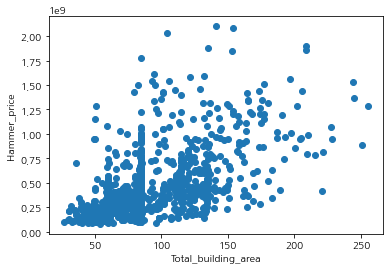

In [48]:
plt.scatter(x = aucmo['Total_building_area'], y = aucmo['Hammer_price'])
plt.ylabel('Hammer_price')
plt.xlabel('Total_building_area')

### 우상향 관계로 볼 수 있음

Text(0.5, 0, 'Total_building_auction_area')

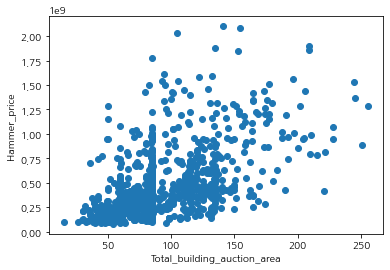

In [49]:
plt.scatter(x = aucmo['Total_building_auction_area'], y = aucmo['Hammer_price'])
plt.ylabel('Hammer_price')
plt.xlabel('Total_building_auction_area')

Text(0.5, 0, 'point.y')

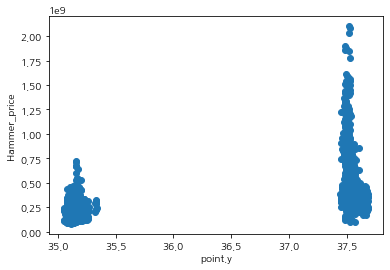

In [50]:
plt.scatter(x = aucmo['point.y'], y = aucmo['Hammer_price'])
plt.ylabel('Hammer_price')
plt.xlabel('point.y')

### 쓸 수 없는 변수

# bar plot에서 높은 가격대를 형성하는 구에 더 많은 score를 부여?

In [78]:
aucmo.head()

Auction_key Auction_class Bid_class  Claim_price Appraisal_company  \
9          2666            임의        일반    150000000              연산감정   
13         2550            임의        일반    135000000              미르감정   
16         2682            임의        일반    149393725              금정감정   
22         2491            임의        일반    122134370              문일감정   
34         2576            임의        일반    200000000              국제감정   

         Appraisal_date  Auction_count  Auction_miscarriage_count  \
9   2017-03-27 00:00:00              2                          1   
13  2016-07-24 00:00:00              2                          1   
16  2017-07-04 00:00:00              3                          2   
22  2016-01-26 00:00:00              2                          1   
34  2016-08-26 00:00:00              1                          0   

    Total_land_gross_area  Total_land_real_area  Total_land_auction_area  \
9                27447.20                 78.52                    78.52   
13                   0.00                  0.00                     0.00   
16               12133.70                 25.70                    25.70   
22               12133.70                 20.60                    20.60   
34               18183.50                 40.46                    40.46   

    Total_building_area  Total_building_auction_area  Total_appraisal_price  \
9                 84.92                        84.92              163000000   
13               106.34                       106.34              560000000   
16                74.45                        74.45              165000000   
22                59.67                        59.67              145000000   
34                84.98                        84.98              374000000   

    Minimum_sales_price   First_auction_date   Final_auction_date  \
9             130400000  2017-09-26 00:00:00  2017-10-31 00:00:00   
13            448000000  2017-01-19 00:00:00  2017-03-30 00:00:00   
16            105600000  2017-12-05 00:00:00  2018-03-20 00:00:00   
22            116000000  2016-06-23 00:00:00  2016-07-28 00:00:00   
34            374000000  2017-01-24 00:00:00  2017-01-24 00:00:00   

   Final_result Creditor addr_do addr_si addr_dong Apartment_usage  \
9            낙찰   코카콜라음료      부산    해운대구       재송동             아파트   
13           낙찰    대부F&D      부산    해운대구        중동             아파트   
16           낙찰   HK저축은행      부산    해운대구       재송동             아파트   
22           낙찰   청룡동(새)      부산    해운대구       재송동             아파트   
34           낙찰  Private      부산    해운대구       반여동             아파트   

   Preserve_regist_date  Total_floor  Current_floor Share_auction_YorN  \
9   1990-08-10 00:00:00            5              4                  N   
13  2015-06-17 00:00:00           39              5                  N   
16  2009-09-28 00:00:00           21              1                  N   
22  2000-09-28 00:00:00           12              2                  N   
34  2006-01-20 00:00:00           29             28                  N   

     road_name           Close_date Close_result  point.y  point.x  \
9      재반로84번길  2017-12-27 00:00:00           배당    35.19   129.13   
13  좌동순환로433번길  2017-07-24 00:00:00           배당    35.16   129.18   
16         재반로  2018-05-16 00:00:00           배당    35.19   129.13   
22         재반로  2016-09-26 00:00:00           배당    35.19   129.13   
34         반여로  2017-03-29 00:00:00           배당    35.20   129.12   

    Hammer_price  
9      177070000  
13     518800000  
16     143999000  
22     136630000  
34     421000000

In [84]:
catd= aucmo.groupby('addr_si').Hammer_price.mean().sort_values(ascending=False)

In [92]:
add = catd.index

In [94]:
add

Index(['강남구', '서초구', '용산구', '송파구', '영등포구', '동작구', '성동구', '광진구', '종로구', '강동구',
       '양천구', '마포구', '동대문구', '관악구', '성북구', '중구', '서대문구', '강북구', '강서구', '구로구',
       '금천구', '중랑구', '은평구', '노원구', '해운대구', '도봉구', '수영구', '연제구', '남구', '부산진구',
       '금정구', '기장군', '서구', '북구', '동래구', '사상구', '영도구', '사하구', '동구'],
      dtype='object', name='addr_si')

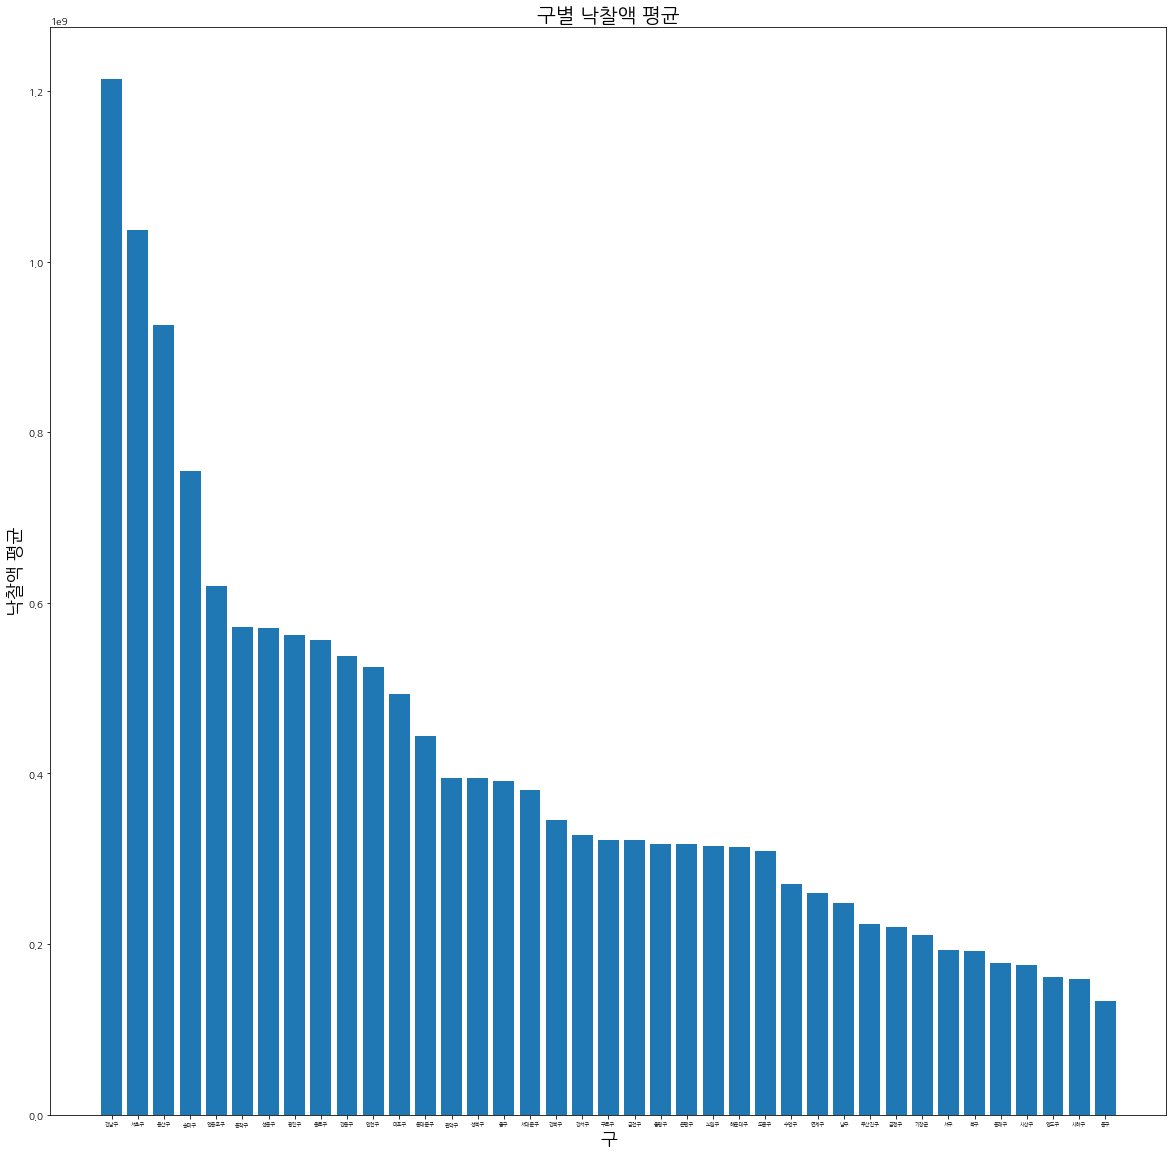

In [93]:
index = np.arange(len(add))
plt.rcParams['figure.figsize'] = [20, 20]
plt.bar(index, catd)
plt.title('구별 낙찰액 평균', fontsize=20)
plt.xlabel('구', fontsize=18)
plt.ylabel('낙찰액 평균', fontsize=18)
plt.xticks(index, add, fontsize=5)
plt.show()

### 개인적인 판단으로는 강남구-송파구 = 6, 영등포구-동대문구 = 4, 관악구-강북구=3,강서구-도봉구=2,이외1로 score 부여하는게 어떤가 하는 생각